C:\Users\shams\AppData\Local\Temp\ipykernel_10092\81807254.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
C:\Users\shams\AppData\Local\Temp\ipykernel_10092\81807254.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_imag[i] =- np.trapz(signal * sine_term, sampled_times)


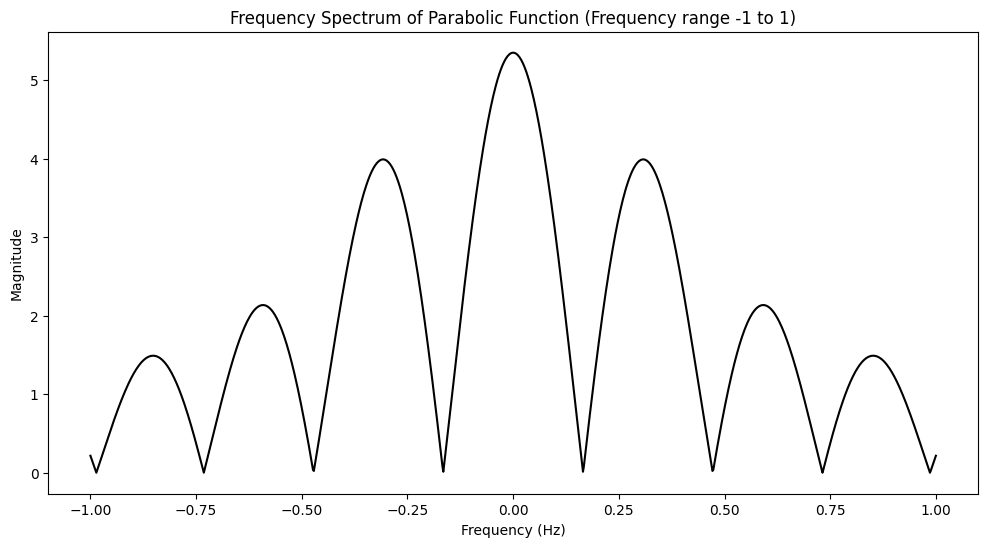

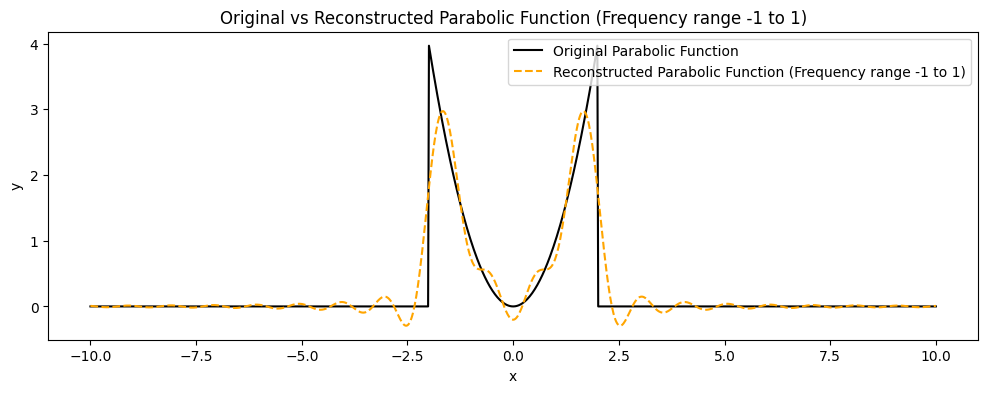

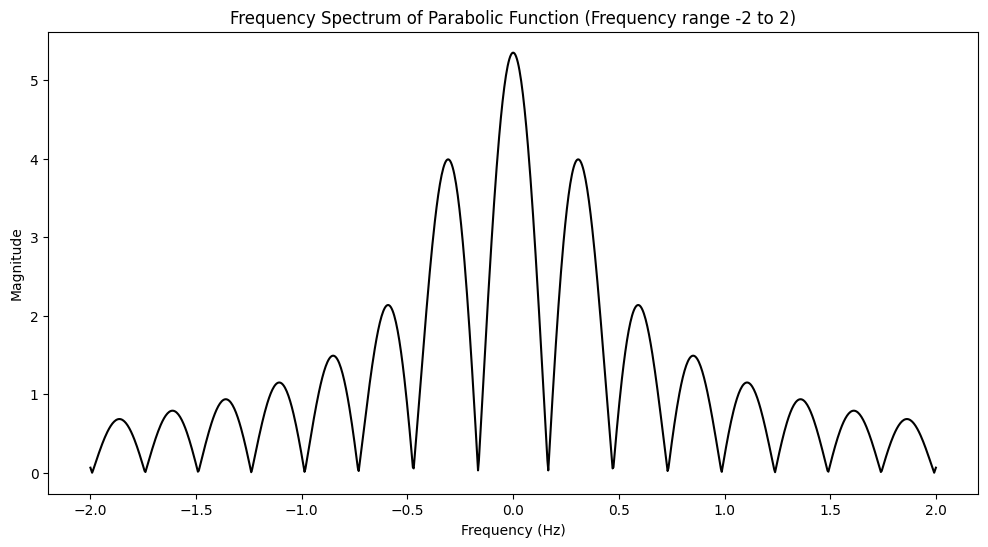

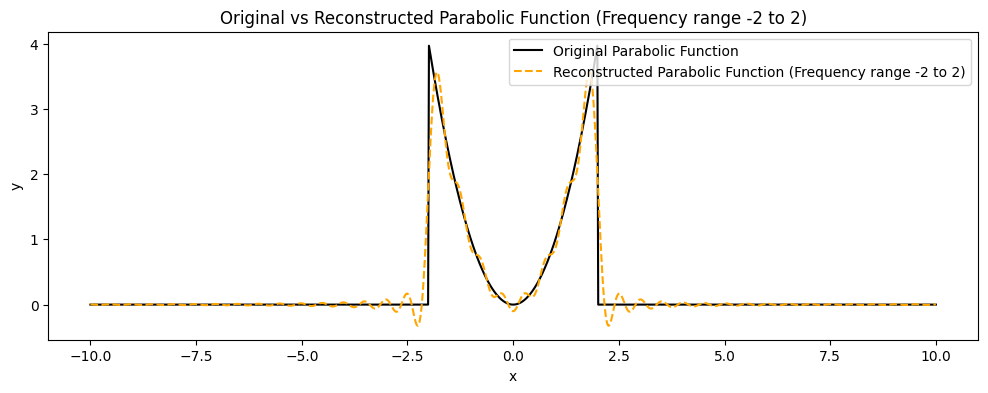

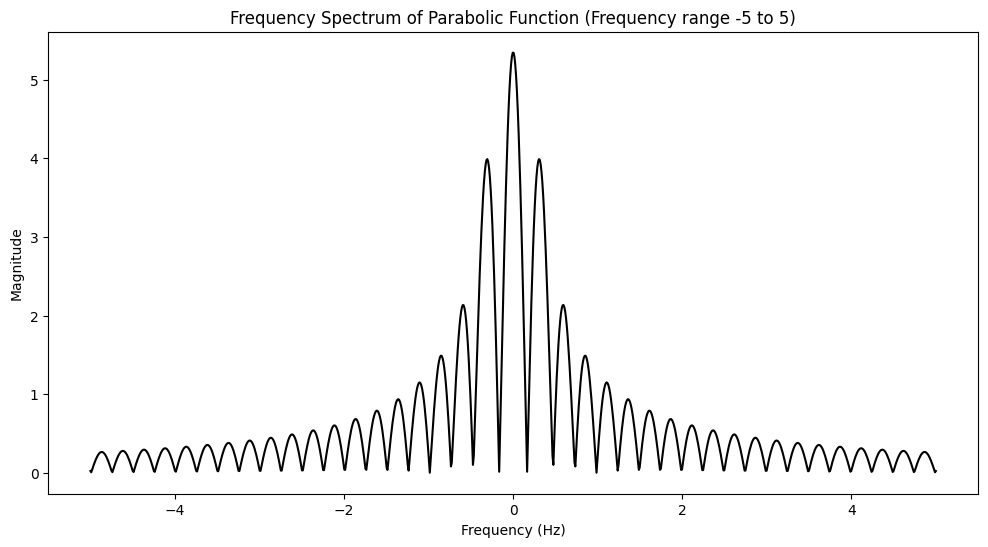

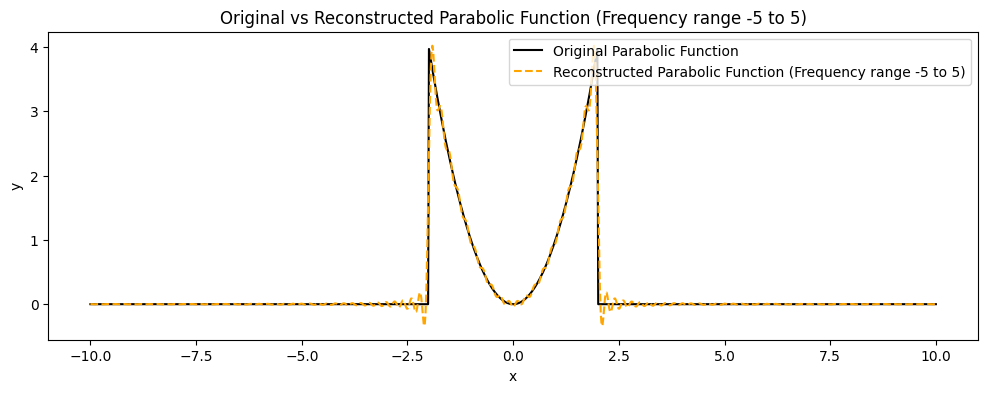

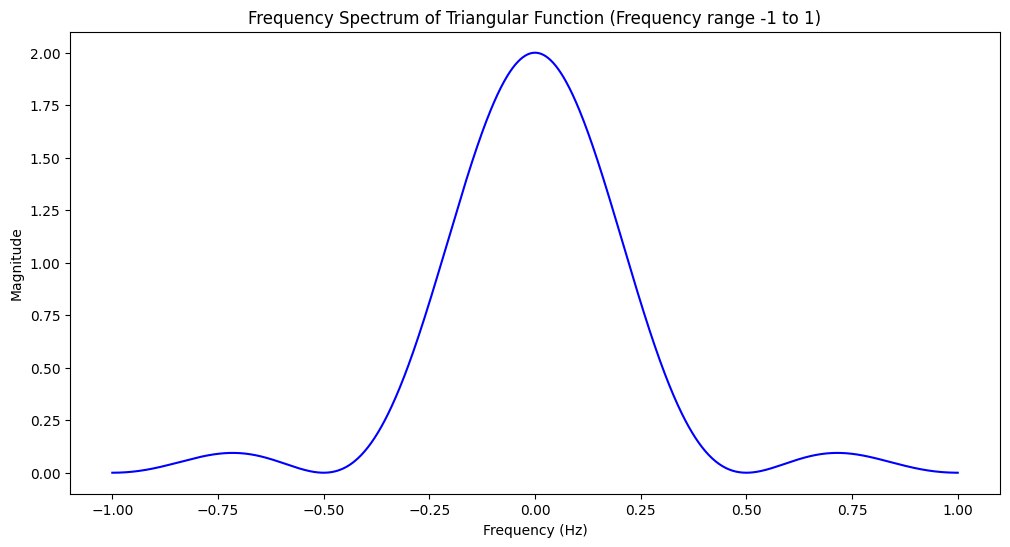

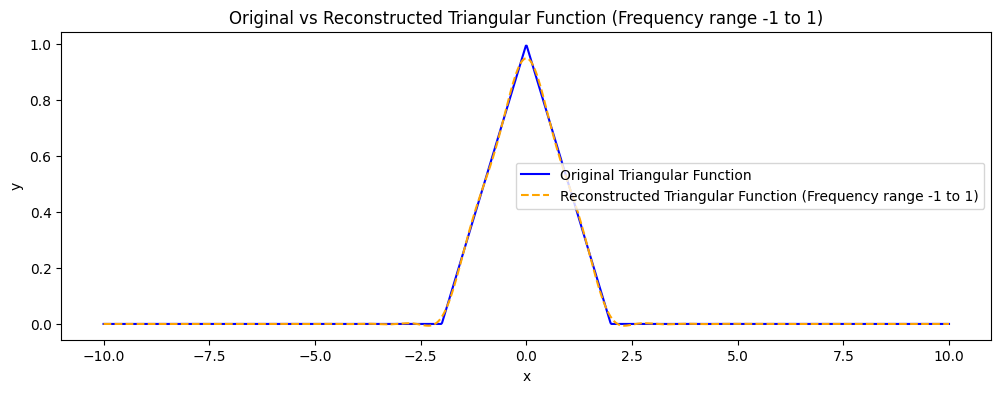

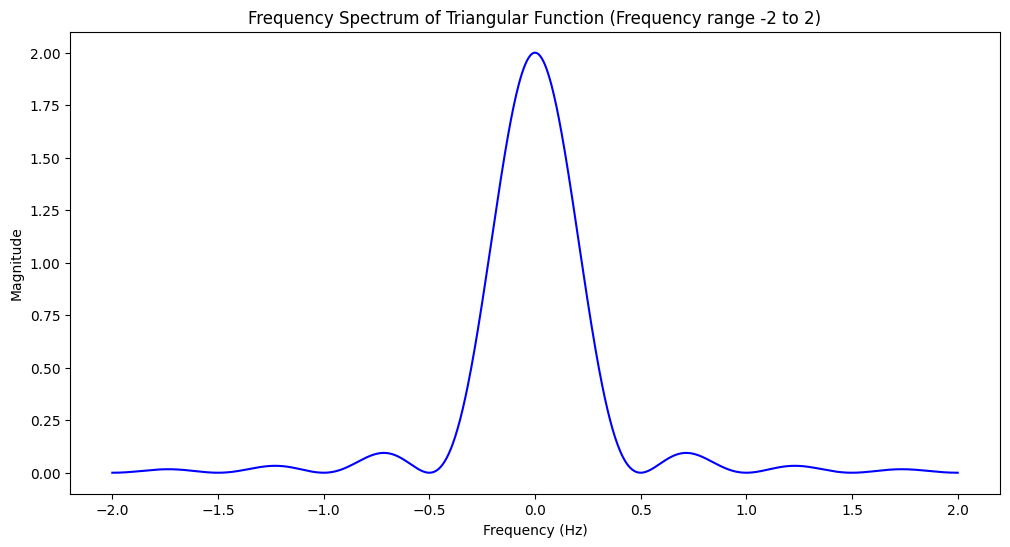

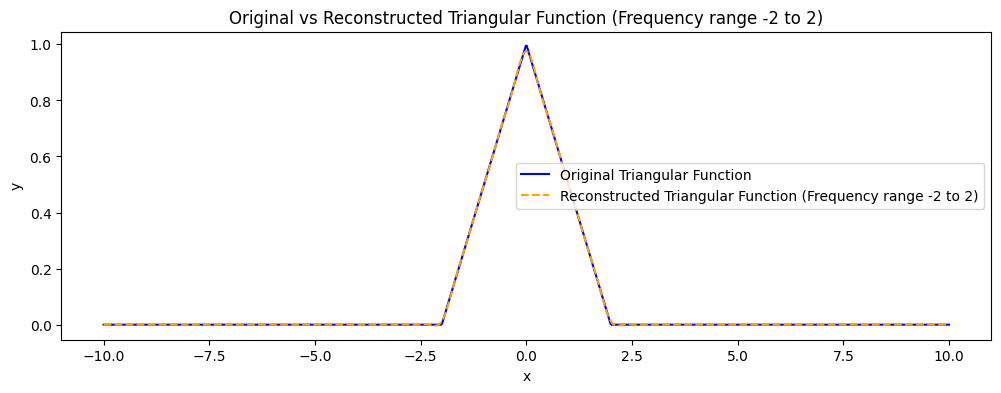

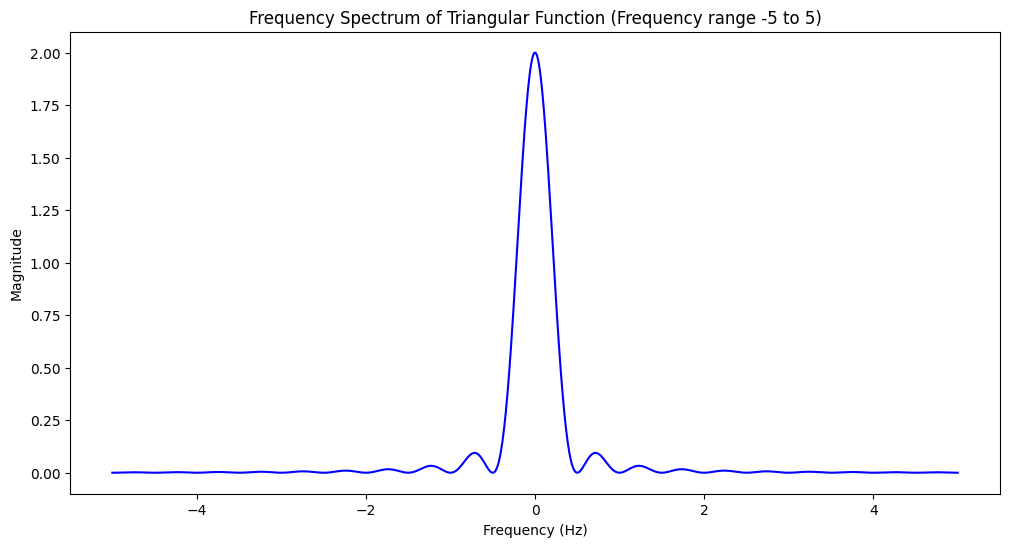

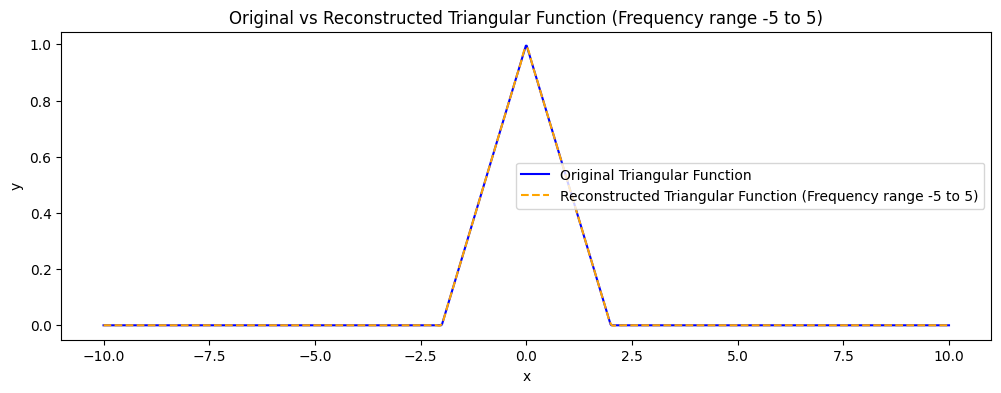

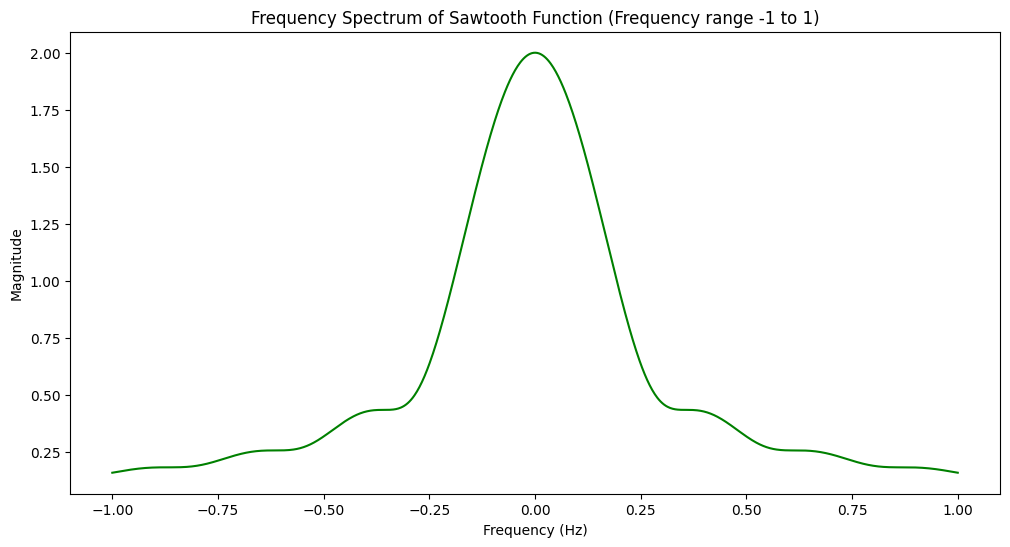

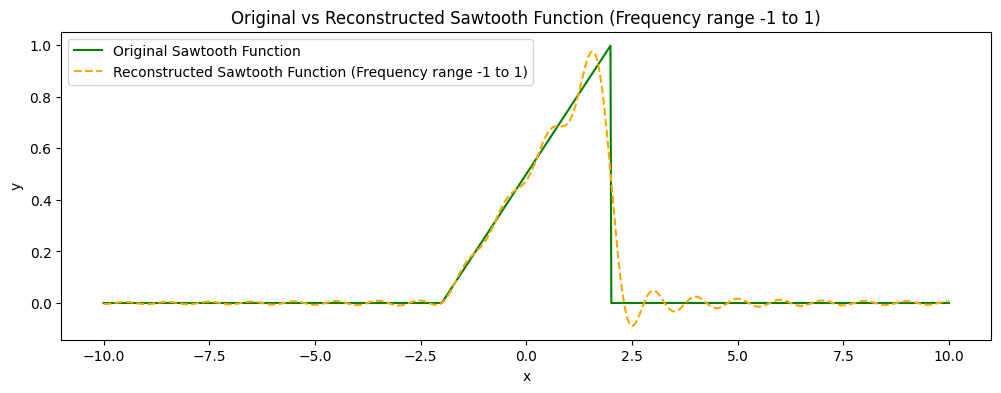

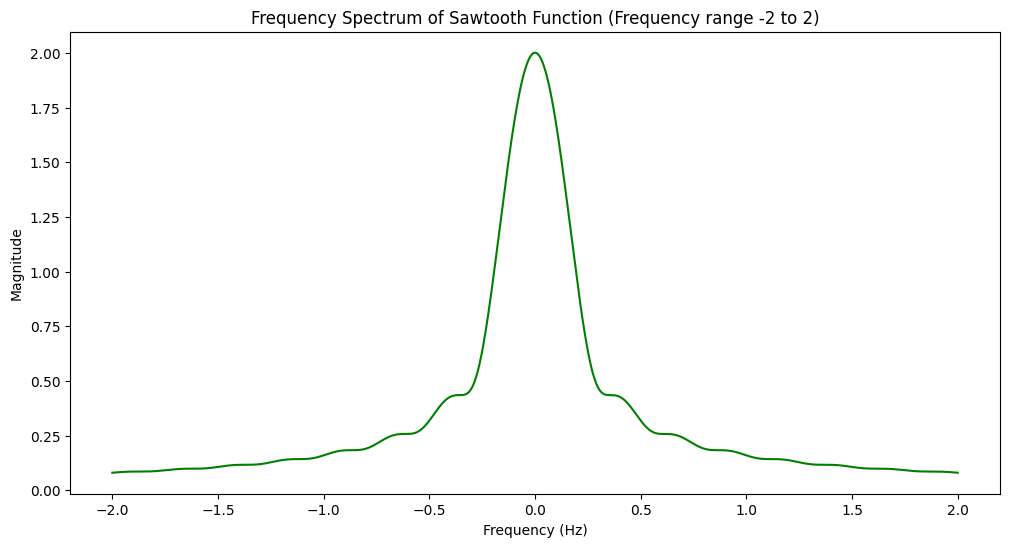

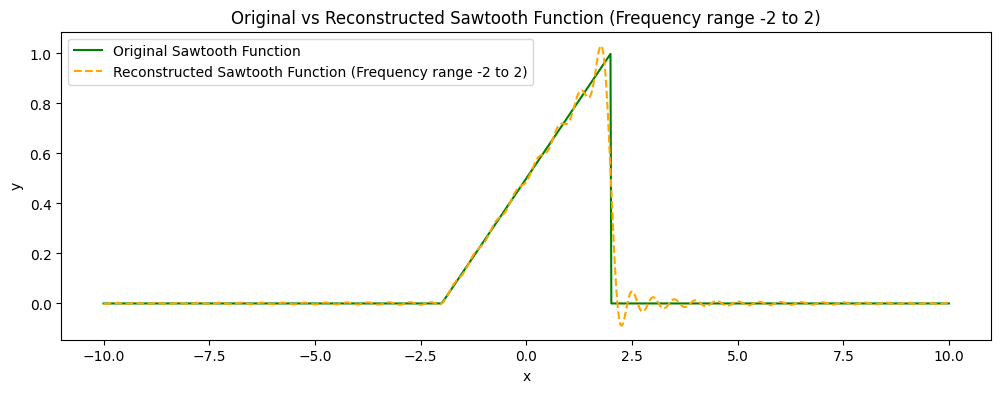

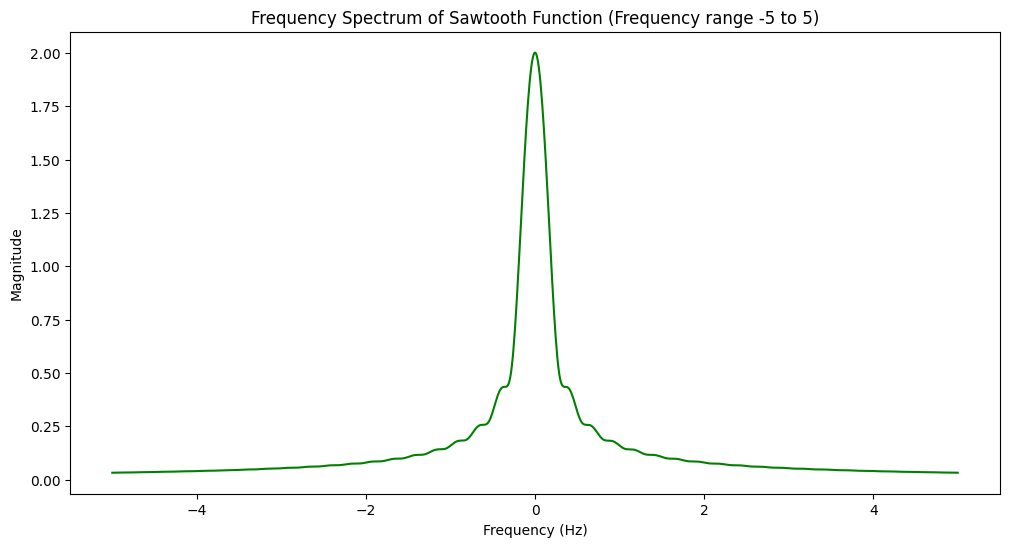

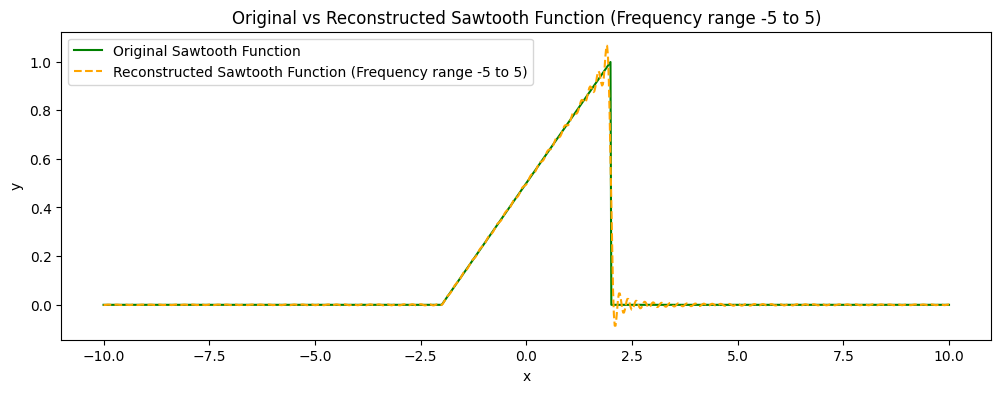

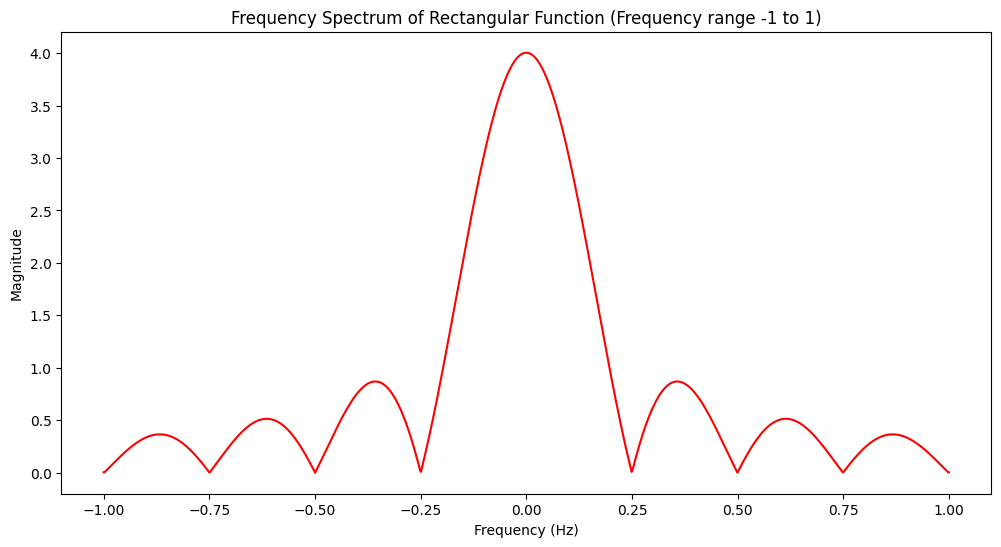

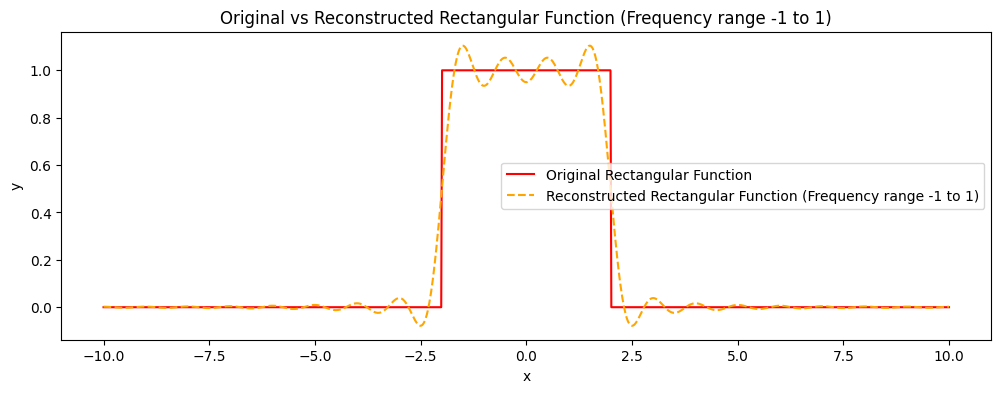

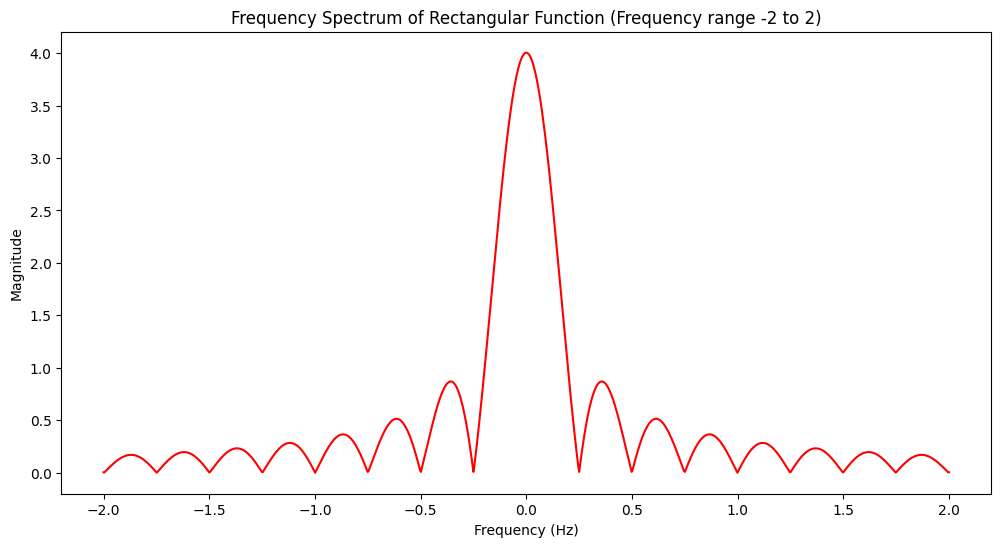

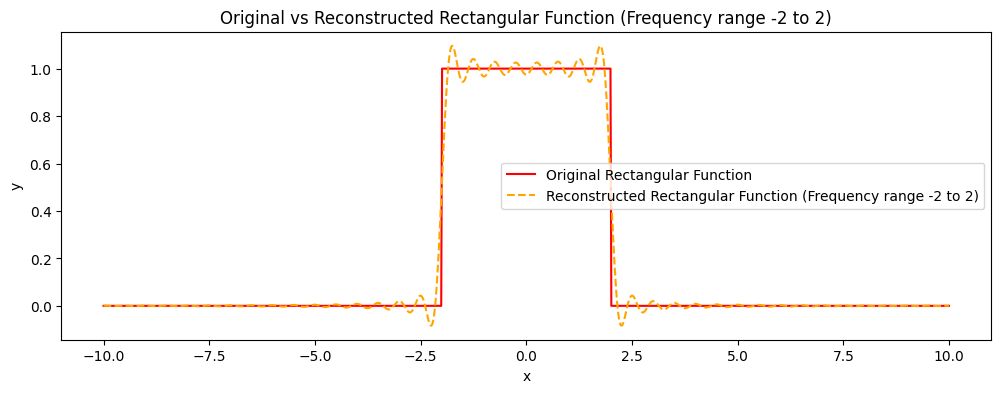

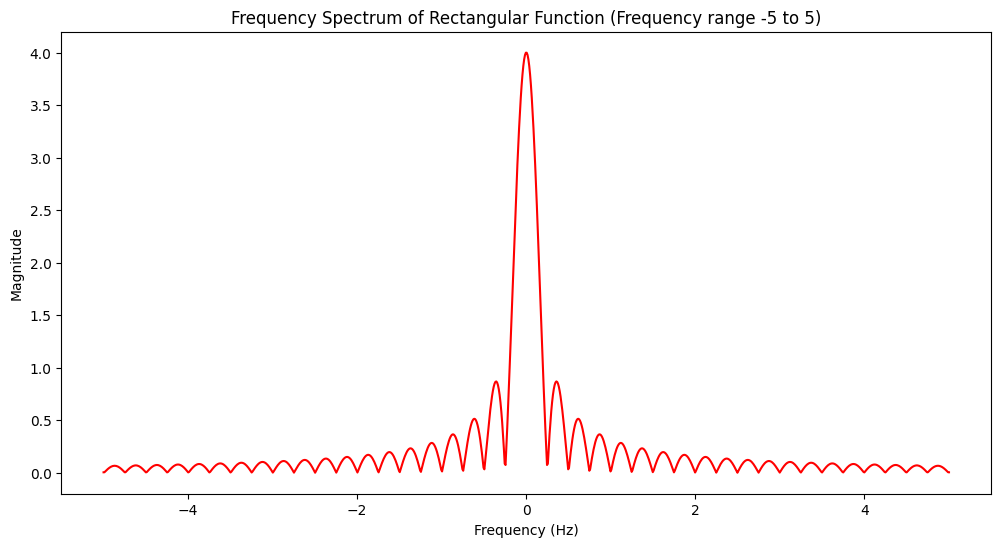

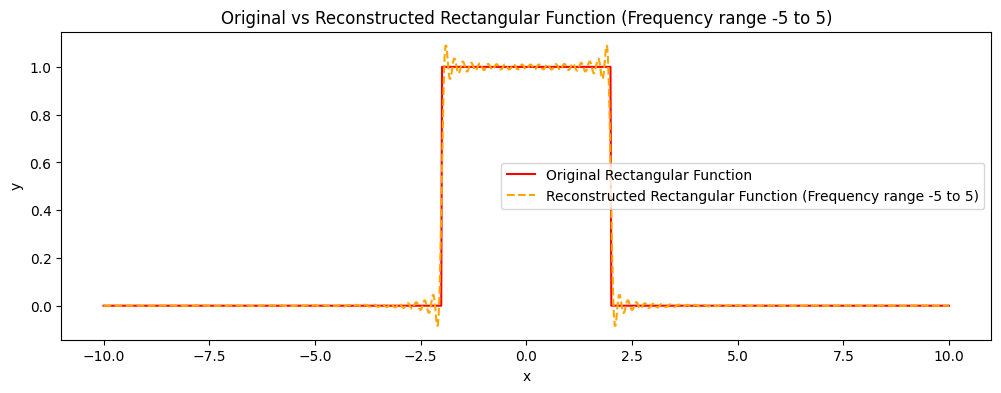

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions
def parabolic_function(x_values):
    """Create a parabolic function y = x^2 within [-2, 2], 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), x_values**2, 0)

def triangular_function(x_values):
    """Triangular wave within [-2, 2] with height 1, 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), 1 - np.abs(x_values) / 2, 0)

def sawtooth_function(x_values):
    """Sawtooth wave within [-2, 2] with a slope of 1, 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), (x_values + 2) / 4, 0)

def rectangular_function(x_values):
    """Rectangular pulse within [-2, 2] with height 1, 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), 1, 0)

def fourier_transform(signal, frequencies, sampled_times):
    """Compute the Fourier Transform of a signal using trapezoidal integration."""
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)
    
    for i, freq in enumerate(frequencies):
        cosine_term = np.cos(2 * np.pi * freq * sampled_times)
        sine_term = np.sin(2 * np.pi * freq * sampled_times)
        ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
        ft_result_imag[i] =- np.trapz(signal * sine_term, sampled_times)
    
    return ft_result_real, ft_result_imag

def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    """Reconstruct the signal using the Inverse Fourier Transform."""
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)
    
    for i, t in enumerate(sampled_times):
        real_part = np.sum(ft_signal[0] * np.cos(2 * np.pi * frequencies * t))
        imag_part = np.sum(ft_signal[1] * np.sin(2 * np.pi * frequencies * t))
        reconstructed_signal[i] = (real_part - imag_part) * (frequencies[1] - frequencies[0])
    
    return reconstructed_signal

# Define the interval and sample points
x_values = np.linspace(-10, 10, 1000)
y_values = parabolic_function(x_values)

frequency_ranges = [1, 2, 5]
functions = [
    ("Parabolic Function", y_values, "black"),
    ("Triangular Function", triangular_function(x_values), "blue"),
    ("Sawtooth Function", sawtooth_function(x_values), "green"),
    ("Rectangular Function", rectangular_function(x_values), "red")
]

for func_name, func_values, color in functions:
    for freq_limit in frequency_ranges:
        frequencies = np.linspace(-freq_limit, freq_limit, 1000)
        sampled_times = x_values
        
        # Apply Fourier Transform to the function
        ft_data = fourier_transform(func_values, frequencies, sampled_times)
        
        # Plot the frequency spectrum
        plt.figure(figsize=(12, 6))
        plt.plot(frequencies, np.sqrt(ft_data[0]**2 + ft_data[1]**2), color=color)
        plt.title(f"Frequency Spectrum of {func_name} (Frequency range -{freq_limit} to {freq_limit})")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()
        
        # Reconstruct the function from FT data using Inverse Fourier Transform
        reconstructed_func_values = inverse_fourier_transform(ft_data, frequencies, sampled_times)
        
        # Plot the original and reconstructed functions for comparison
        plt.figure(figsize=(12, 4))
        plt.plot(x_values, func_values, label=f"Original {func_name}", color=color)
        plt.plot(sampled_times, reconstructed_func_values, label=f"Reconstructed {func_name} (Frequency range -{freq_limit} to {freq_limit})", color="orange", linestyle="--")
        plt.title(f"Original vs Reconstructed {func_name} (Frequency range -{freq_limit} to {freq_limit})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()


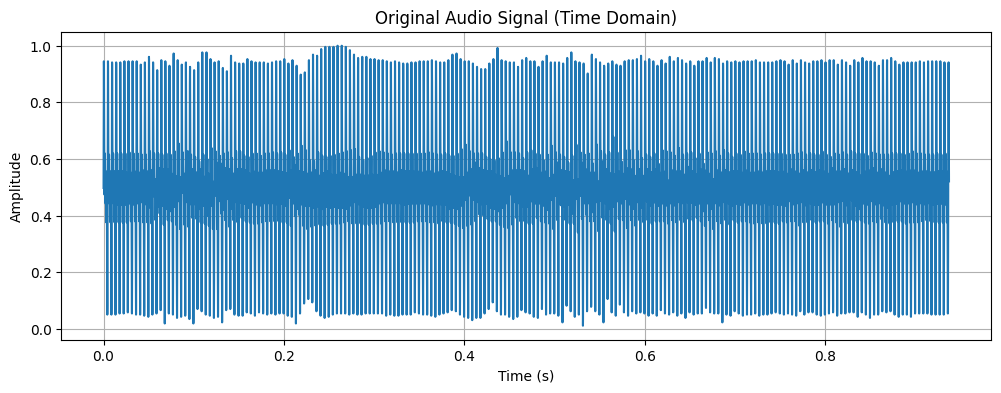

C:\Users\shams\AppData\Local\Temp\ipykernel_16668\1265752081.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
C:\Users\shams\AppData\Local\Temp\ipykernel_16668\1265752081.py:43: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_imag[i] = np.trapz(signal * sine_term, sampled_times)


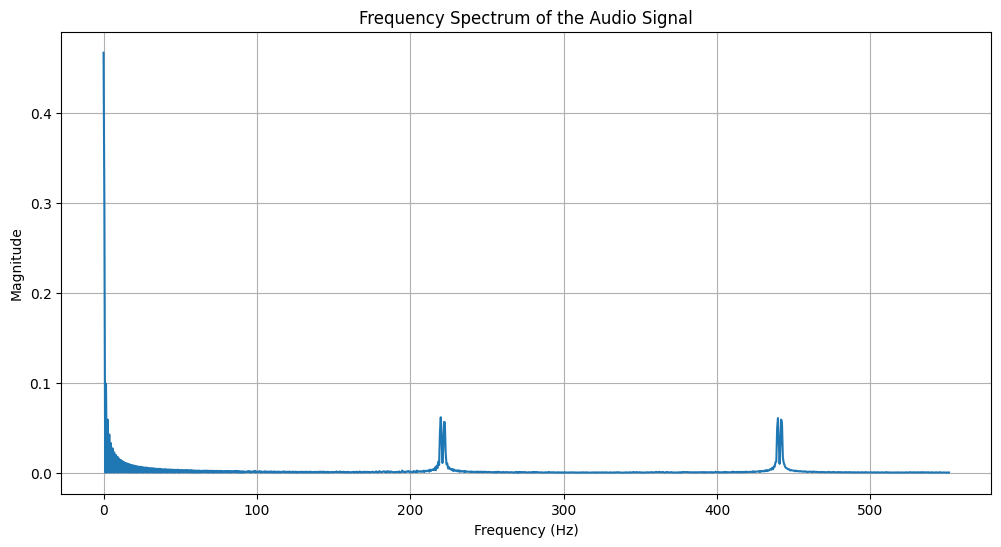

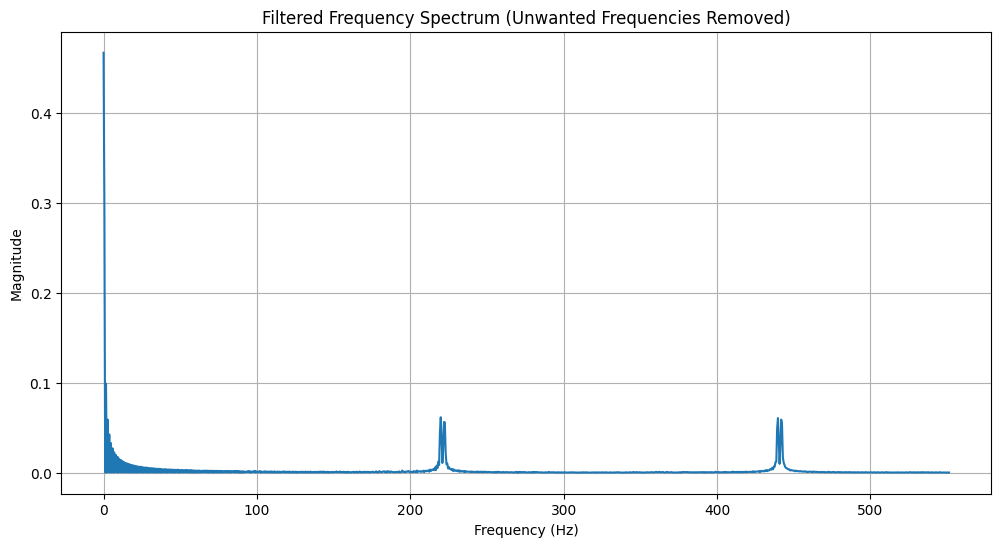

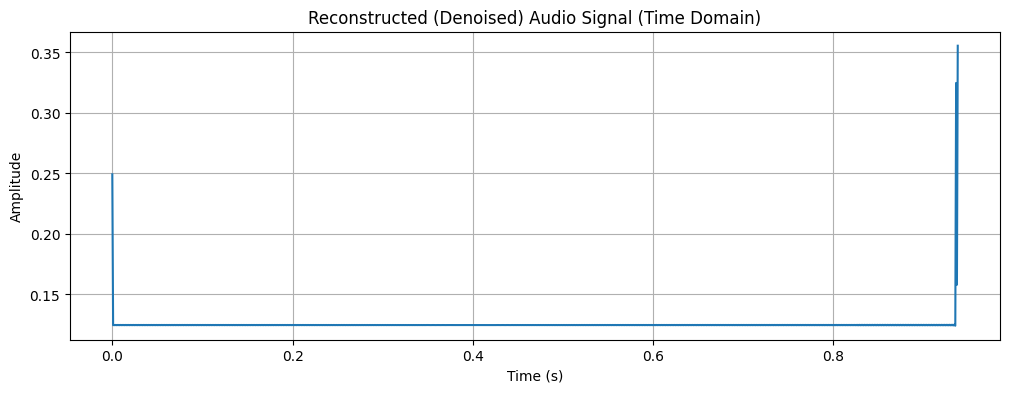

Denoised audio saved as 'denoised_audio.wav'


In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Step 1: Load the audio file
sample_rate, data = wavfile.read('buzzjc.wav')
data = data / np.max(np.abs(data))  # Normalize to -1 to 1

# If stereo, convert to mono by averaging channels
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Step 1.1: Plot the original audio signal in the time domain
plt.figure(figsize=(12, 4))
time = np.linspace(0, len(data) / sample_rate, num=len(data))
plt.plot(time, data)
plt.title("Original Audio Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Set parameters for interval sampling and FT
interval_step = 10  # Adjust for sampling every 'interval_step' data points  
data_sampled = data[::interval_step]
max_time = len(data_sampled) / (sample_rate / interval_step)
sampled_times = np.linspace(0, max_time, num=len(data_sampled))

max_freq = sample_rate / (2 * interval_step)
num_freqs = len(data_sampled)
frequencies = np.linspace(0, max_freq, num=num_freqs)

# Step 2: Apply Fourier Transform using trapezoidal integration
def fourier_transform(signal, frequencies, sampled_times):
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)

    for i, freq in enumerate(frequencies):
        cosine_term = np.cos(2 * np.pi * freq * sampled_times)
        sine_term = np.sin(2 * np.pi * freq * sampled_times)
        ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
        ft_result_imag[i] = np.trapz(signal * sine_term, sampled_times)

    return ft_result_real, ft_result_imag

# Apply FT with trapezoidal integration
ft_data = fourier_transform(data_sampled, frequencies, sampled_times)

# Step 2.1: Visualize the frequency spectrum
plt.figure(figsize=(12, 6))
magnitude = np.sqrt(ft_data[0]**2 + ft_data[1]**2)
plt.plot(frequencies, magnitude)
plt.title("Frequency Spectrum of the Audio Signal")
plt.xlabel("Frequency (Hz)")

plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Step 3: Filter out unwanted noise frequencies
filtered_ft_data = np.zeros((2, num_freqs))
filtered_ft_data[0] = ft_data[0].copy()
filtered_ft_data[1] = ft_data[1].copy()

# Identify noise frequencies (Example: Experiment with specific ranges)
noise_indices = (frequencies > 1000) & (frequencies < 2000)  # Example range of noisy tones
filtered_ft_data[0][noise_indices] = 0
filtered_ft_data[1][noise_indices] = 0

# Step 3.1: Visualize the filtered frequency spectrum
plt.figure(figsize=(12, 6))
magnitude_filtered = np.sqrt(filtered_ft_data[0]**2 + filtered_ft_data[1]**2)
plt.plot(frequencies, magnitude_filtered)
plt.title("Filtered Frequency Spectrum (Unwanted Frequencies Removed)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Step 4: Apply Inverse Fourier Transform using trapezoidal integration
def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)

    for i, t in enumerate(sampled_times):
        real_part = np.sum(ft_signal[0] * np.cos(2 * np.pi * frequencies * t))
        imag_part = np.sum(ft_signal[1] * np.sin(2 * np.pi * frequencies * t))
        reconstructed_signal[i] = (real_part - imag_part) * (frequencies[1] - frequencies[0])

    return reconstructed_signal

# Step 4.1: Reconstruct the signal using IFT
filtered_data = inverse_fourier_transform(filtered_ft_data, frequencies, sampled_times)

# Step 4.2: Plot the reconstructed audio signal
plt.figure(figsize=(12, 4))
plt.plot(sampled_times, filtered_data)
plt.title("Reconstructed (Denoised) Audio Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Step 5: Normalize and save the denoised audio
filtered_data = np.int16(filtered_data / np.max(np.abs(filtered_data)) * 32767)  # Convert to int16 format for WAV
wavfile.write('denoised_audio.wav', sample_rate, filtered_data)

print("Denoised audio saved as 'denoised_audio.wav'")
